## Yêu cầu 3: Phân tích dữ liệu

1. Vẽ biểu đồ phân bố mức lương theo vị trí
2. Vẽ bản đồ nhiệt (heatmap) phân bố việc làm theo khu vực
3. Biểu đồ xu hướng công nghệ hot

In [5]:
import pandas as pd

In [1]:
import sys
from pathlib import Path

ROOT_DIR = Path.cwd().parent
sys.path.append(str(ROOT_DIR))

In [2]:
# Setup db connection
from src.load.postgres import create_pg_engine
engine = create_pg_engine()

In [9]:
query = '''
    SELECT * FROM public.jobs
'''

df = pd.read_sql(sql=query, con=engine)
df.sample(5)

,created_date,job_title,company,salary,address,time,link_description,salary_num,min_salary,max_salary,salary_unit,city,district,job_group,processed_time
486,2023-08-01,Nhân Viên Phân Tích Nghiệp Vụ Phần Mềm (Ba),Công ty Cổ phần Giải pháp Công nghệ Elsaga,Thoả thuận,Hà Nội: Hà Đông,Còn 25 ngày để ứng tuyển,https://www.topcv.vn/viec-lam/nhan-vien-phan-t...,NaN,NaN,NaN,None,Hà Nội,Hà Đông,business_analyst,2025-12-18 15:51:04.505105
7,2023-08-01,Thực Tập Sinh Lập Trình Viên .Net,CÔNG TY TNHH CÔNG NGHỆ VÀ TRUYỀN THÔNG IIT,2 - 6 triệu,Hà Nội: Cầu Giấy,Còn 25 ngày để ứng tuyển,https://www.topcv.vn/viec-lam/thuc-tap-sinh-la...,4000000.0,2000000.0,6000000.0,VND,Hà Nội,Cầu Giấy,backend,2025-12-18 15:51:04.505105
1100,2023-08-01,QC Engineer - English Speaking,CÔNG TY TNHH VSL VIỆT NAM,Tới 23 triệu,Hồ Chí Minh: Tân Bình,Còn 13 ngày để ứng tuyển,https://www.topcv.vn/viec-lam/qc-engineer-engl...,23000000.0,NaN,23000000.0,VND,Hồ Chí Minh,Tân Bình,software_engineer,2025-12-18 15:51:04.505105
1659,2023-08-01,Java Developer (Springboot) - Hà Nội,Ngân Hàng TMCP Việt Nam Thịnh Vượng (VPBank),Thoả thuận,Hà Nội: Đống Đa,Còn 60 ngày để ứng tuyển,https://www.topcv.vn/viec-lam/java-developer-s...,NaN,NaN,NaN,None,Hà Nội,Đống Đa,backend,2025-12-18 15:51:04.505105
1472,2023-08-01,Lập Trình Ruby On Rails,CÔNG TY TNHH CÔNG NGHỆ AMCOLAB,Thoả thuận,Hà Nội: Nam Từ Liêm,Còn 5 ngày để ứng tuyển,https://www.topcv.vn/viec-lam/lap-trinh-ruby-o...,NaN,NaN,NaN,None,Hà Nội,Nam Từ Liêm,software_engineer,2025-12-18 15:51:04.505105


### Phân bố mức lương theo vị trí

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style='darkgrid',
    context='paper',
    font_scale=0.9
)

plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

In [59]:
salary_job_group_df = df[['salary_num', 'job_group']]
# salary_job_group_df

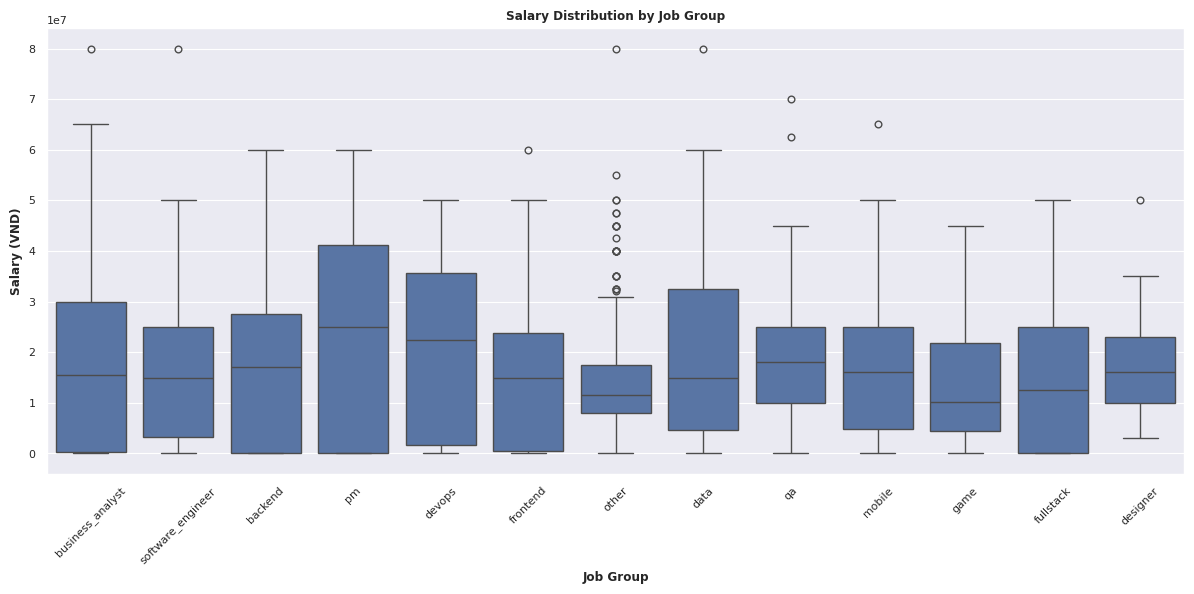

In [60]:
plt.figure(figsize=(12,6))

sns.boxplot(
    data=salary_job_group_df,
    x='job_group',
    y='salary_num',
)

plt.xticks(rotation=45)
plt.xlabel('Job Group')
plt.ylabel('Salary (VND)')
plt.title('Salary Distribution by Job Group')
plt.tight_layout()
plt.show()

### Phân bố việc làm theo khu vực

In [61]:
heatmap_df = (
    df
    .dropna(subset=["city", "job_group"])
    .pivot_table(
        index="city",
        columns="job_group",
        values="job_title",
        aggfunc="count",
        fill_value=0
    )
)
heatmap_df.sample(2)

job_group,backend,business_analyst,data,designer,devops,frontend,fullstack,game,mobile,other,pm,qa,software_engineer
city,,,,,,,,,,,,,
Hưng Yên,0,0,0,0,0,0,0,0,0,1,0,0,0
Cần Thơ,2,0,2,1,0,1,0,0,0,0,0,2,2


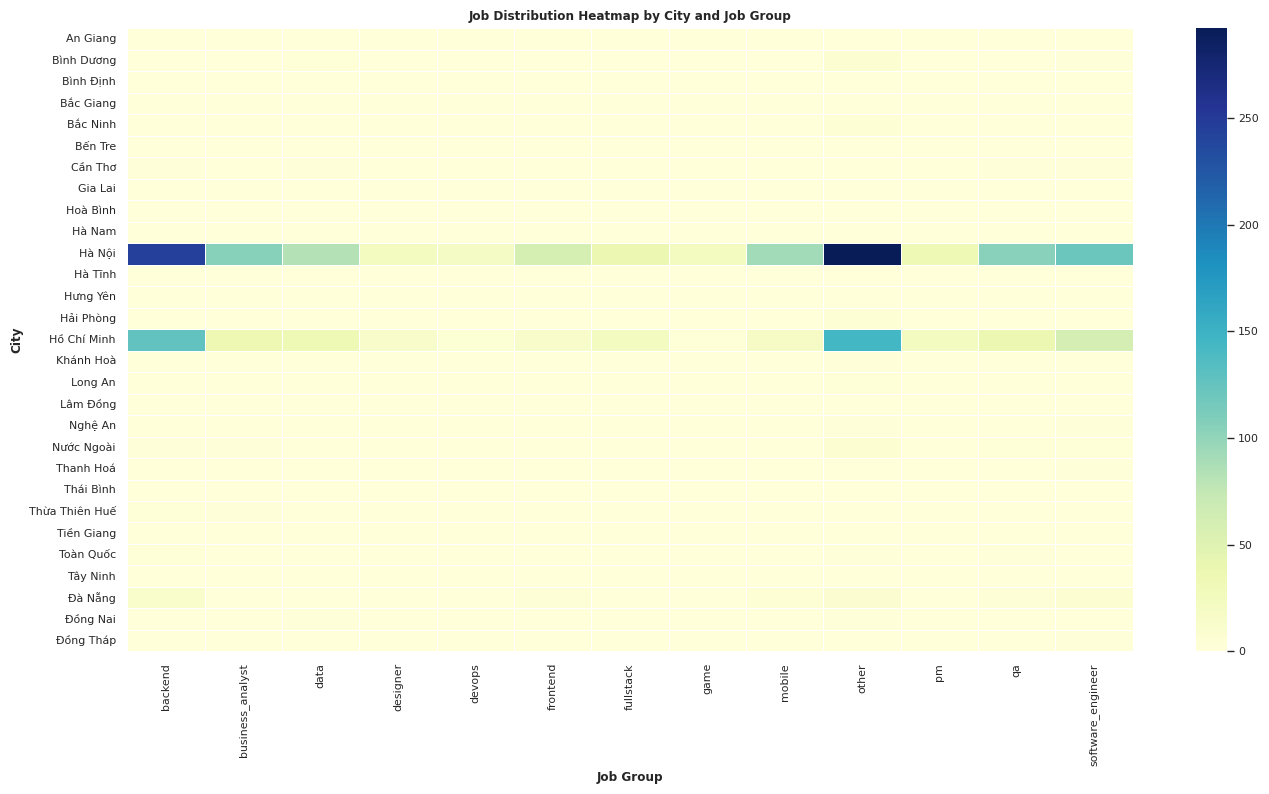

In [62]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_df,
    cmap="YlGnBu",
    linewidths=0.5
)

plt.title("Job Distribution Heatmap by City and Job Group")
plt.xlabel("Job Group")
plt.ylabel("City")
plt.tight_layout()
plt.show()

### Xu hướng hot

In [63]:
job_count_per_group = (
    df["job_group"]
    .value_counts()
    .reset_index()
)

job_count_per_group.columns = ["job_group", "count"]
job_count_per_group

,job_group,count
0,other,492
1,backend,396
2,software_engineer,208
3,qa,154
4,business_analyst,148
5,data,124
6,mobile,119
7,frontend,81
8,fullstack,62
9,pm,58


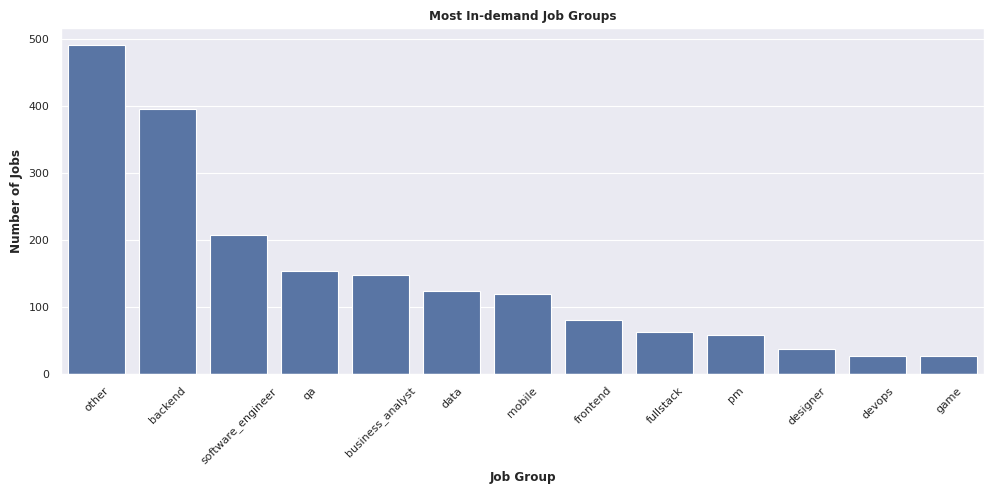

In [64]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=job_count_per_group,
    x="job_group",
    y="count"
)

plt.xticks(rotation=45)
plt.xlabel("Job Group")
plt.ylabel("Number of Jobs")
plt.title("Most In-demand Job Groups")
plt.tight_layout()
plt.show()